## Load data

In [1]:
from sklearn import  datasets
from matplotlib import pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target



## Data preprocessing

In [2]:
# split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_tr, X_ts , y_tr, y_ts = train_test_split(X, y, random_state=1,
                                          stratify=y,
                                          test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_tr)
X_std_tr = scaler.transform(X_tr)
X_std_ts = scaler.transform(X_ts)

# KNN classifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                          p=2, # norm ||d||-L2
                          metric='minkowski'# type of metric
                          )
# 
knn.fit(X_tr, y_tr)

KNeighborsClassifier()

## Visualize

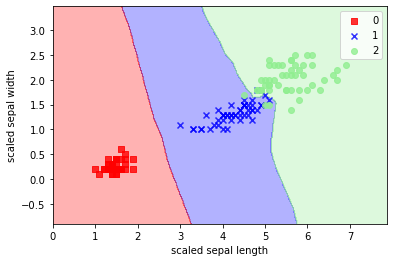

In [5]:
from plot_decision import plot_decision_regions
# combine for plotting
X_comb = np.vstack((X_tr, X_ts))
y_comb = np.hstack((y_tr, y_ts))

plot_decision_regions(X_comb, y_comb, classifier= knn)
plt.ylabel('scaled sepal width')
plt.xlabel('scaled sepal length')
plt.legend()
plt.show()